# Tweet Sentiment Analysis with Logistic Regression Visualization

This notebook details a lab exercise where I explored logistic regression for tweet sentiment analysis, a key concept from the "Natural Language Processing with Classification and Vector Spaces" course. It features key visualizations, including a scatter plot of tweets based on their positive and negative features, and the decision boundary of a trained logistic regression model.

##Setup and Imports

In [38]:
import os
import re
import string
from os import getcwd # Import the getcwd function to get the current working directory
from collections import Counter # Import Counter for counting hashable objects
import pandas as pd                 # Library for Dataframes
import matplotlib.pyplot as plt     # Library for visualization
import numpy as np                  # Library for math functions
import nltk                         # NLP toolbox

# NLTK modules
from nltk.corpus import twitter_samples # Import the twitter_samples dataset from nltk
from nltk.corpus import stopwords # Import stopwords from nltk
from nltk.stem import PorterStemmer # Import PorterStemmer for stemming words
from nltk.tokenize import TweetTokenizer # Import TweetTokenizer for tokenizing tweetsr

## Tweet Preprocessing and Frequency Building Functions

In [39]:
# Process tweet function
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

# Build frequencies
def build_freqs(tweets, ys):
    yslist = np.squeeze(ys).tolist() # Convert np array to list since zip needs an iterable

    # Start with an empty dictionary and populate it by looping over all tweets
    # and all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

##Load the data

In [40]:
# Select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets ## Concatenate the lists.
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

# Split the data into two pieces, one for training and one for testing (validation set)
train_pos  = all_positive_tweets[:4000]
train_neg  = all_negative_tweets[:4000]

train_x = train_pos + train_neg

print("Number of tweets: ", len(train_x))

Number of tweets:  8000


##Load the extracted features

In [41]:
# Create the data directory if it doesn't exist
if not os.path.exists('./data'):
    os.makedirs('./data')

# Create a placeholder logistic_features.csv file
# Replace the content below with your actual data
placeholder_data = """bias,positive,negative,sentiment
1,0.1,0.05,1
1,0.2,0.03,1
1,0.01,0.15,0
1,0.08,0.12,0
"""

with open('./data/logistic_features.csv', 'w') as f:
    f.write(placeholder_data)

print("Placeholder 'logistic_features.csv' created in the ./data directory. Please replace the content with your actual data.")

Placeholder 'logistic_features.csv' created in the ./data directory. Please replace the content with your actual data.


In [42]:
data = pd.read_csv('./data/logistic_features.csv'); # Load a 3 columns csv file using pandas function
data.head(10) # Print the first 10 data entries

,bias,positive,negative,sentiment
0,1,0.10,0.05,1
1,1,0.20,0.03,1
2,1,0.01,0.15,0
3,1,0.08,0.12,0


In [43]:
# Each feature is labeled as bias, positive and negative
X = data[['bias', 'positive', 'negative']].values # Get only the numerical values of the dataframe
Y = data['sentiment'].values; # Put in Y the corresponding labels or sentiments

print(X.shape) # Print the shape of the X part
print(X) # Print some rows of X

(4, 3)
[[1.   0.1  0.05]
 [1.   0.2  0.03]
 [1.   0.01 0.15]
 [1.   0.08 0.12]]


## Load a pretrained Logistic Regression model

In [44]:
theta = [6.03518871e-08, 5.38184972e-04, -5.58300168e-04]

## Plot the samples in a scatter plot

Text(0, 0.5, 'Negative')

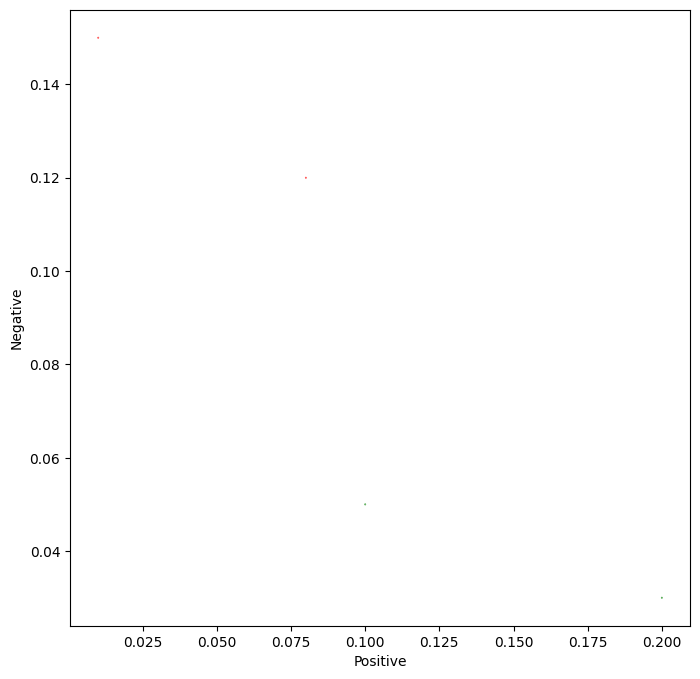

In [45]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

## Plot the model alongside the data

In [48]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (-w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested
# in the direction. So this direction is just a perpendicular function to the
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

The green line in the chart points in the direction where z > 0 and the red line points in the direction where z < 0. The direction of these lines are given by the weights $\theta_1$ and $\theta_2$

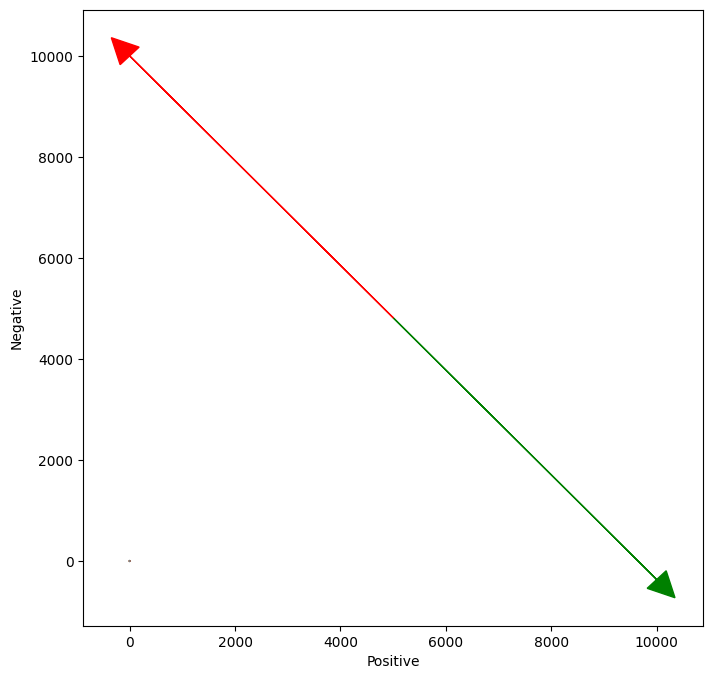

In [47]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart.
maxpos = np.max(X[:,1])

offset = 5000 # The pos value for the direction vectors origin

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray')

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()